In [1]:
import os
import typing
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import *
import sklearn.gaussian_process.kernels as ker
import matplotlib.pyplot as plt
from matplotlib import cm
import random
from solution import *


# Set `EXTENDED_EVALUATION` to `True` in order to visualize your predictions.
EXTENDED_EVALUATION = False
EVALUATION_GRID_POINTS = 300  # Number of grid points used in extended evaluation
EVALUATION_GRID_POINTS_3D = 50  # Number of points displayed in 3D during evaluation


# Cost function constants
COST_W_UNDERPREDICT = 25.0
COST_W_NORMAL = 1.0
COST_W_OVERPREDICT = 10.0

In [2]:
train_features = np.loadtxt("train_x.csv", delimiter=",", skiprows=1)
train_GT = np.loadtxt("train_y.csv", delimiter=",", skiprows=1)
test_features = np.loadtxt("test_x.csv", delimiter=",", skiprows=1)

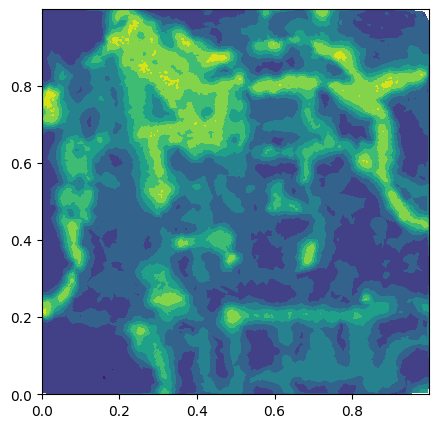

In [3]:
fig1 = plt.figure(figsize=(5,5))
plt.tricontourf(train_features[:,0], train_features[:,1], train_GT)
#plt.scatter(train_features[:,0], train_features[:,1], color='red', alpha=1, s=np.ones_like(train_GT)*0.5)

In [4]:
rows = 5
cols = 5
max_points_per_cell = 200

# Main

In [5]:
print("ground truth parameters",train_GT.min(), train_GT.max(), train_GT.mean())

# Fit the model
print("Fitting model")
model = Model()
model.fitting_model(train_GT, train_features)

ground truth parameters -1.7625469060104306 64.896183806836 33.17299788386897
Fitting model
fit runtime :  8.650136947631836


In [6]:
# Predict on the test features
print("Predicting on test features")
predictions, gp_mean, gp_std = model.make_predictions(test_features)
print(predictions, predictions.min(), predictions.max())

cost_of_pred = cost_function(train_GT, model.make_predictions(train_features)[0])
print(cost_of_pred)

Predicting on test features
[55.30258591 54.49840734 41.3785694  ... 39.97458469 50.31486142
 41.52287518] 1.1042788443244724 62.45618364978364
478.29783412366896


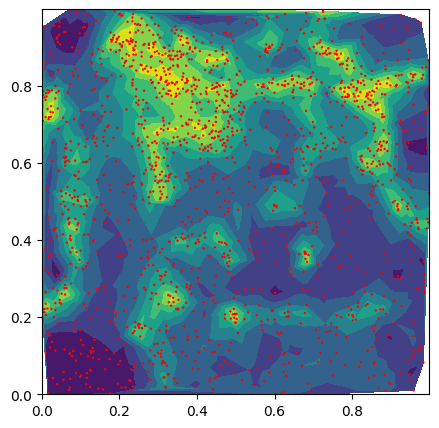

In [7]:
fig1 = plt.figure(figsize=(5,5))
plt.tricontourf(test_features[:,0], test_features[:,1], predictions)
plt.scatter(test_features[:,0], test_features[:,1], color='red', alpha=1, s=np.ones_like(predictions)*0.5)